In [1]:
import numpy as np 
import pandas as pd 

df_actigraphy= pd.read_pickle('df_actigraphy_features.pkl')
df_features= pd.read_pickle('df_featureEngg.pkl')

print(df_actigraphy.info())
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 0
Columns: 161 entries, id to anglez_night_max
dtypes: float64(160), object(1)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height         

In [9]:
df_features_subset= df_features.loc[:,['id','sii','PCIAT-PCIAT_Total']]
df_actigraphy_id = df_features_subset.merge(df_actigraphy, on='id', how='left' )
df_actigraphy_id.head()
df = df_actigraphy_id

EDA for Variable -  X_count
-------------------
Breakup of Nulls
True     2964
False     996
Name: X_count, dtype: int64
     count           mean            std      min       25%       50%  \
sii                                                                     
0.0  583.0  314704.281304  132084.036304    927.0  250703.0  380304.0   
1.0  266.0  319795.266917  130781.514824   1386.0  285396.0  388296.0   
2.0  137.0  314668.802920  140172.498237   2080.0  225134.0  384125.0   
3.0   10.0  292138.600000  161429.288291  10670.0  241152.0  377430.0   

          75%       max  
sii                      
0.0  402240.0  756212.0  
1.0  403245.0  593331.0  
2.0  403128.0  674410.0  
3.0  399771.0  434892.0  
MultiIndex([('X_count', 'count', 0.0),
            ('X_count', 'count', 1.0),
            ('X_count', 'count', 2.0),
            ('X_count', 'count', 3.0),
            (  'Total',      '',  '')],
           names=[None, None, 'sii'])


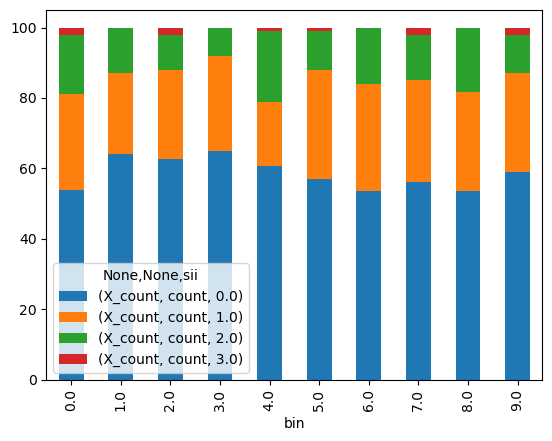

In [10]:
def numeric_var_eda(var_for_eda_numeric):
    print ("EDA for Variable - ", var_for_eda_numeric)
    print ("-------------------")
    print ("Breakup of Nulls")
    print (df[var_for_eda_numeric].isna().value_counts())
    print (df.groupby('sii')[var_for_eda_numeric].describe())
    df_for_var = df.loc[:,['sii',var_for_eda_numeric]]
    df_for_var['bin'] = pd.qcut(df_for_var[var_for_eda_numeric].rank(method='first'), 10, labels=False)

    df_for_var.groupby(['sii','bin'])['bin'].count().unstack('sii')
    df_groupby_res = df_for_var.groupby(['sii','bin']).agg({var_for_eda_numeric : [ 'count']}).unstack('sii').fillna(0)

    df_groupby_res['Total']=df_groupby_res.apply(sum,axis=1)

    plot_columns= df_groupby_res.columns
    len_plot_columns= len(plot_columns)
    print(plot_columns)
    for i in plot_columns[0:len_plot_columns-1]:
        df_groupby_res[i]=100*df_groupby_res[i]/df_groupby_res['Total']

    df_groupby_res.iloc[:,0:len_plot_columns-1].plot(kind='bar', stacked=True)
    df_for_var.groupby(['bin']).agg({var_for_eda_numeric : [ np.min, np.max]})

numeric_var_eda('X_count')    

EDA for Variable -  X_wear_max
-------------------
Breakup of Nulls
True     2964
False     996
Name: X_wear_max, dtype: int64
     count      mean       std       min       25%       50%       75%  \
sii                                                                      
0.0  583.0  1.730289  0.929675  0.252878  1.192454  1.520621  1.961526   
1.0  266.0  1.618840  0.744973  0.768610  1.058833  1.480773  1.863585   
2.0  137.0  1.547626  0.921824  0.622891  1.017271  1.253436  1.763942   
3.0   10.0  1.150851  0.327674  0.922891  1.011071  1.044559  1.134990   

          max  
sii            
0.0  8.022779  
1.0  7.957859  
2.0  7.935687  
3.0  2.057005  
MultiIndex([('X_wear_max', 'count', 0.0),
            ('X_wear_max', 'count', 1.0),
            ('X_wear_max', 'count', 2.0),
            ('X_wear_max', 'count', 3.0),
            (     'Total',      '',  '')],
           names=[None, None, 'sii'])


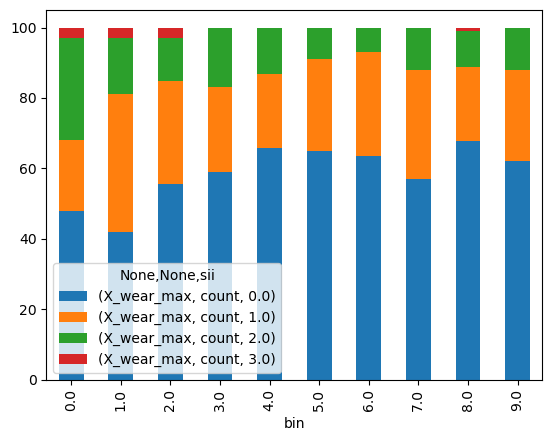

KeyboardInterrupt: Interrupted by user

In [14]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


var_name =df.columns[3:]

for i in var_name:
    clear_output(wait=True)
    #categorical_var_eda(i)
    numeric_var_eda(i)
    plt.show()
    input("Press Enter to continue...")
    


In [21]:
pd.set_option('display.max_rows', 400)
df.corrwith(df['PCIAT-PCIAT_Total']).sort_values()

enmo_wear_mean          -0.252083
enmo_wear_75%           -0.236060
enmo_wear_std           -0.231564
enmo_mean               -0.223615
enmo_std                -0.222783
enmo_weekends_std       -0.219081
enmo_weekends_mean      -0.208955
enmo_75%                -0.204666
enmo_wear_50%           -0.200609
enmo_weekends_75%       -0.187913
enmo_50%                -0.172526
enmo_weekends_50%       -0.167369
enmo_weekends_max       -0.157236
Z_weekends_max          -0.148678
enmo_wear_max           -0.139970
enmo_max                -0.139928
Y_max                   -0.138864
Y_wear_max              -0.138409
X_weekends_std          -0.134014
X_std                   -0.131289
Y_weekends_max          -0.128798
X_night_std             -0.128481
X_weekends_max          -0.121944
enmo_wear_25%           -0.121195
enmo_weekends_25%       -0.114509
X_wear_std              -0.111116
X_wear_max              -0.110618
X_night_75%             -0.109227
enmo_25%                -0.107143
X_max         

In [22]:
df_features.corrwith(df['PCIAT-PCIAT_Total']).sort_values()

FGC-FGC_SRL_Zone                         -0.148850
FGC-FGC_SRR_Zone                         -0.109682
Basic_Demos-Sex                          -0.093648
FGC-FGC_SRL                              -0.091221
FGC-FGC_SRR                              -0.077836
CGAS-CGAS_Score                          -0.070542
Fitness_Endurance-Time_Mins              -0.052376
Fitness_Endurance-Max_Stage              -0.041720
Physical-HeartRate                       -0.037594
FGC-FGC_TL_Zone                          -0.037214
PAQ_A-PAQ_A_Total                        -0.026854
PAQ_C-PAQ_C_Total                        -0.021943
FGC-FGC_GSND_Zone                        -0.009525
BIA-BIA_BMC                              -0.008870
FGC-FGC_CU_Zone                          -0.004454
Fitness_Endurance-Time_Sec               -0.000373
FGC-FGC_GSD_Zone                          0.006861
BIA-BIA_LDM                               0.025885
BIA-BIA_ECW                               0.035568
BIA-BIA_FFM                    

EDA for Variable -  enmo_wear_mean
-------------------
Breakup of Nulls
True     2964
False     996
Name: enmo_wear_mean, dtype: int64
     count      mean       std       min       25%       50%       75%  \
sii                                                                      
0.0  583.0  0.047520  0.022910  0.000488  0.031884  0.043945  0.061456   
1.0  266.0  0.038404  0.020067  0.003802  0.024282  0.036837  0.050366   
2.0  137.0  0.034699  0.021053  0.001510  0.021077  0.032021  0.042673   
3.0   10.0  0.030114  0.025815  0.006064  0.015697  0.022736  0.036999   

          max  
sii            
0.0  0.156821  
1.0  0.123217  
2.0  0.124294  
3.0  0.096189  
MultiIndex([('enmo_wear_mean', 'count', 0.0),
            ('enmo_wear_mean', 'count', 1.0),
            ('enmo_wear_mean', 'count', 2.0),
            ('enmo_wear_mean', 'count', 3.0),
            (         'Total',      '',  '')],
           names=[None, None, 'sii'])


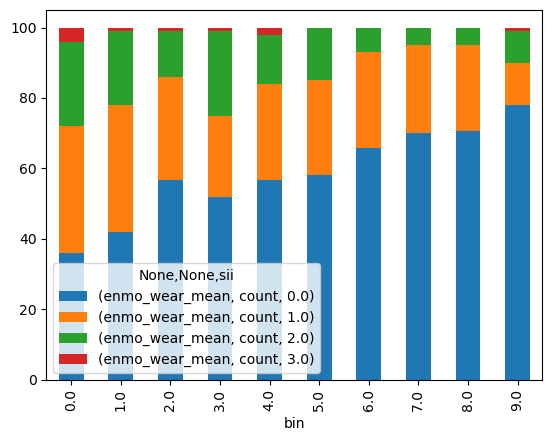

In [29]:
numeric_var_eda('enmo_wear_mean')